In [35]:
import os 
from pathlib import Path, PurePath, PosixPath
from dotenv import load_dotenv, find_dotenv

import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import sys 
from pathlib import Path
from dotenv import load_dotenv, find_dotenv

basepath = Path(os.getcwd())
# make sure your working directory is the repository root.
if basepath.name != "idp-radio-1":
    os.chdir(basepath.parent.parent.parent)
load_dotenv(find_dotenv())


from src.preprocessing.cropping.template_matching import TemplateMatcher
from src.datasets.generator import ImageDataGenerator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
###### Load labels
DATASET_FOLDER = Path(os.environ.get('CHEXPERT_DEV_DATASET_DIRECTORY'))
data = pd.read_csv(DATASET_FOLDER / 'train.csv', index_col=[0])
data = data.fillna(0.0)
data = data

CHEST_XRAY14_DATASETFOLDER = Path(os.environ.get('CHESTXRAY14_DATASET_DIRECTORY'))
train_labels = pd.read_csv(CHEST_XRAY14_DATASETFOLDER / 'meta/data/labels.csv')


## Chexpert

In [37]:
import math

cropped_generator = ImageDataGenerator(dataset=data,
                              label_columns=data.columns[5:19],
                              dataset_folder=DATASET_FOLDER,
                              n_channels=1,
                              batch_size = 20,
                              shuffle=False,
                              crop=True)

generator = ImageDataGenerator(dataset=data,
                              label_columns=data.columns[5:19],
                              dataset_folder=DATASET_FOLDER,
                              n_channels=1,
                              batch_size = 20,
                              shuffle=False,
                              crop=False)

def show_batch_images(batch):    
    w = 10
    h = 10
    fig = plt.figure(figsize=(9, 13))
    columns = 4
    rows = 5

    # prep (x,y) for extra plotting
    xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
    ys = np.abs(np.sin(xs))           # absolute of sine

    # ax enables access to manipulate each of subplots
    ax = []

    fig=plt.figure(figsize=(10, 10))
    for i, img in enumerate(batch[0]):
        ax.append(fig.add_subplot(rows, columns, i+1) )
        plt.imshow(img)

    plt.show()

<Figure size 648x936 with 0 Axes>

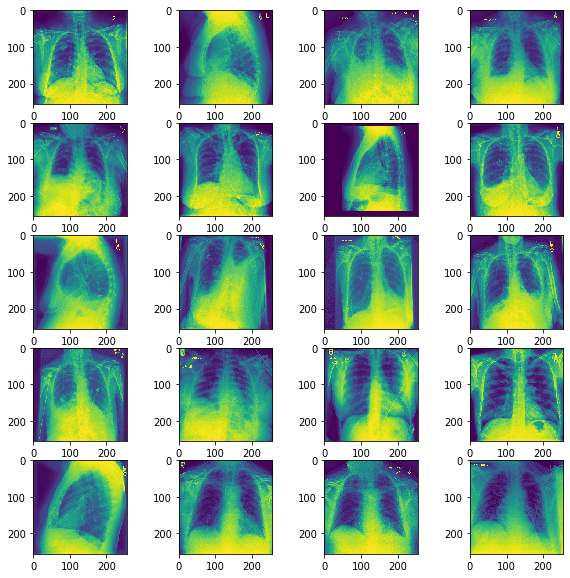

In [38]:
show_batch_images(generator[0])

<Figure size 648x936 with 0 Axes>

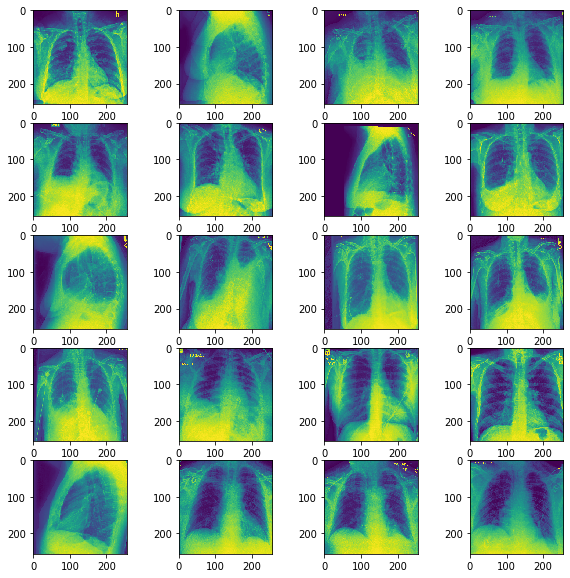

In [39]:
show_batch_images(cropped_generator[0])

## ChestXray 14

In [40]:
import math

cropped_generator_cxy14 = ImageDataGenerator(dataset=train_labels,
                              label_columns=train_labels.columns[13:28],
                              dataset_folder=CHEST_XRAY14_DATASETFOLDER,
                              n_channels=1,
                              batch_size = 20,
                              shuffle=False,
                              crop=True,
                              path_column="Image Index",
                              path_column_prefix="images/", 
                              view_pos_column="View Position",
                              view_pos_frontal="PA", 
                              view_pos_lateral="AP")

generator_cxy14 = ImageDataGenerator(dataset=train_labels,
                              label_columns=train_labels.columns[13:28],
                              dataset_folder=CHEST_XRAY14_DATASETFOLDER,
                              n_channels=1,
                              batch_size = 20,
                              shuffle=False,
                              crop=False,
                              path_column="Image Index",
                              path_column_prefix="images/", 
                              view_pos_column="View Position",
                              view_pos_frontal="PA", 
                              view_pos_lateral="AP")


<Figure size 648x936 with 0 Axes>

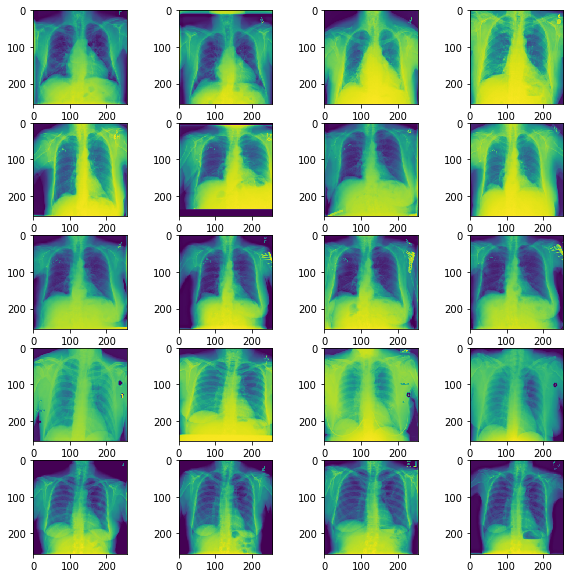

In [41]:
show_batch_images(generator_cxy14[0])

<Figure size 648x936 with 0 Axes>

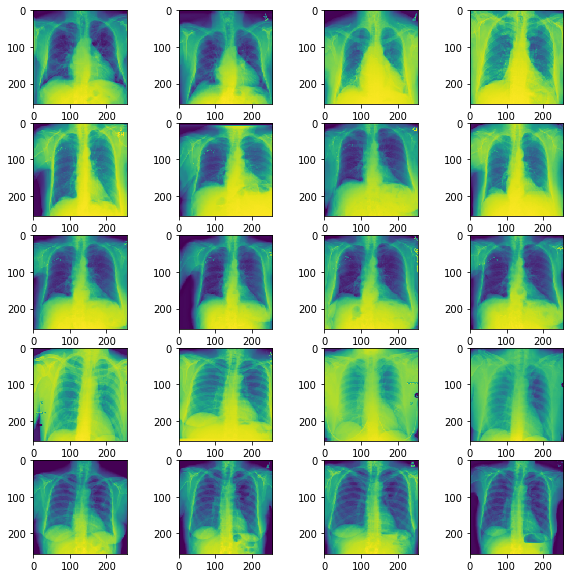

In [42]:
show_batch_images(cropped_generator_cxy14[0])